# Instance-Based Learning

Hi everyone, <br />

This session deals with instance-based learning. 

It will walk you though the following sections:

1. What is instance-based learning ?
2. K-Nearest Neighbors algorithm
3. Predict stock market using K-Nearest Neighbors algorithm
4. Advantages and drawbacks of instance-based learning

## 1. What is instance-based learning ?

Instance-based learning is a very intuitive form of supervised learning. <br>

Instead of using training data to generalize relationships between features and labels, instance-based learning algorithms predict new observations simply by comparing them with observations in the training set. <br>

Instance-based learning algorithms are non-parametric methods as it does not estimate parameters but store training data in memory to compare them with new observations. <br>

Instance-based learning can be used both for classification and regression. 

## 2. K-Nearest Neighbors algorithm

K-nearest neighbors algorithm (k-NN) predicts the label of a new observation based on the k closest observations in the training set. <br>

In classification, the predicted label is the most represented class among the k closest neighbors. <br>
In regression, the predicted value is the average of the values of the k closest neighbors. <br>

**How does k-NN define the k nearest neighbors ?**

K-NN measures distance between a new observation and training instances using mathematical distance within the feature space. The k training instances with the shortest distance are the k nearest neighbors of the new instance and are used to predict the label (classification) or value (regression) of the new instance. <br>

Run the following lines to see most commonly used distance metrics:


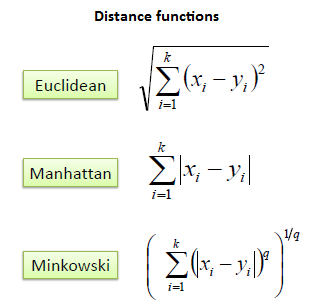

In [1]:
from IPython.display import Image
Image(filename='KNN1.png',width=200, height=200)

** Let's consider the following two-dimensional space with 3 classes **

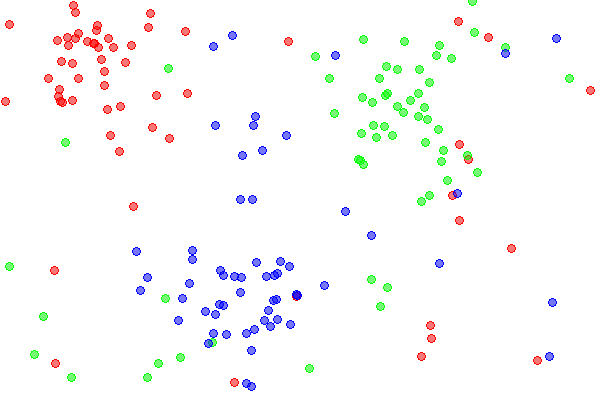

In [2]:
from IPython.display import Image
Image(filename='KNN2.png',width=300, height=300)

** 2.1 Can you link the following k-NN algorithms with classification in the feature space? Comment**

- 1-NN algorithm <br>
- 5-NN algorithm

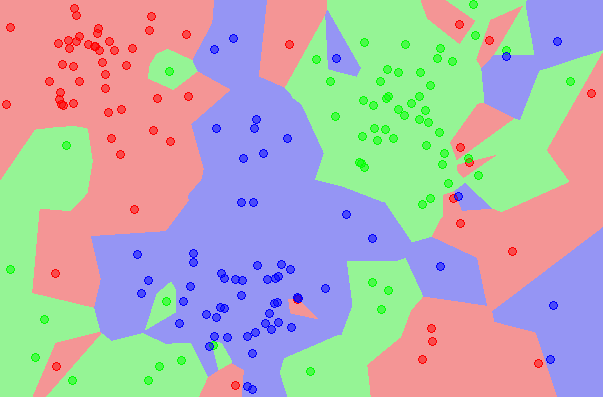

In [11]:
from IPython.display import Image
Image(filename='KNN3.png',width=300, height=300)

1-NN algorithm. Turns to overfit

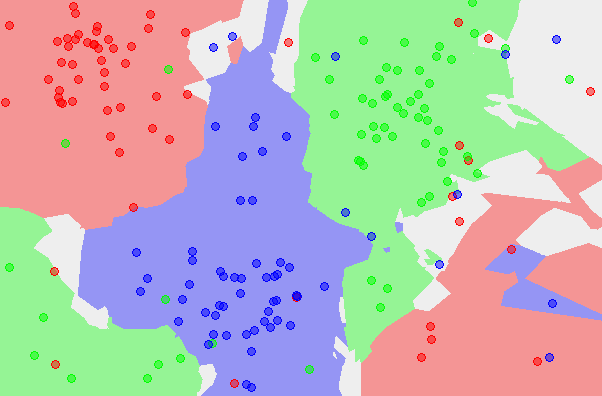

In [10]:
from IPython.display import Image
Image(filename='KNN4.png',width=300, height=300)

5-KNN algorithm. Better than 1-NN

## 3. Predict stock market using K-Nearest Neighbors algorithm

**Let's try to predict stock market movements using k-NN algorithm.**

"stocks.csv" is a dataset crawled from Yahoo Finance. <br>

It contains stock price for Google, Apple and Microsoft between January 4, 2010 and October 21, 2015. <br>

Each observation contains the following variables:<br>
- Date: Date of the observation<br>
- Apple: Closing stock price for Apple<br>
- Google: Closing stock price for Google<br>
- MSFT: Closing stock price for Microsoft<br>
- Increase: Boolean (TRUE/FALSE) whether apple stock increased or not (TRUE: Increases, FALSE: Not increased)<br>

** 3.1 Can you import data from stocks.csv in Python ?**

Create 3 lists:
- stock_features: a list of lists containing the 3 stock values
- stock_increases: a list of lists containing Apple stock increase boolean
- stock_dates: a list of lists containing dates

In [2]:
import unicodecsv
reader = unicodecsv.DictReader(open("stocks.csv"), quotechar="\"", delimiter=",")

In [3]:
x=0
for record in reader:
    if x < 5:
        print record
        x += 1
    else:
        break

{u'Date': u'2010-01-04', u'Increase': u'TRUE', u'Google': u'626.750011', u'Apple': u'214.009998', u'MSFT': u'30.950001'}
{u'Date': u'2010-01-05', u'Increase': u'TRUE', u'Google': u'623.990017', u'Apple': u'214.379993', u'MSFT': u'30.959999'}
{u'Date': u'2010-01-06', u'Increase': u'FALSE', u'Google': u'608.259974', u'Apple': u'210.969995', u'MSFT': u'30.77'}
{u'Date': u'2010-01-07', u'Increase': u'FALSE', u'Google': u'594.100015', u'Apple': u'210.58', u'MSFT': u'30.450001'}
{u'Date': u'2010-01-08', u'Increase': u'TRUE', u'Google': u'602.020005', u'Apple': u'211.980005', u'MSFT': u'30.66'}


In [4]:
stock_features = []
stock_increases = []
stock_dates = []

for row in reader:
    
    features = [float(row["Google"]), float(row["Apple"]), float(row["MSFT"])]
    stock_features.append(features)

    increase = row["Increase"]
    stock_increases.append(increase)
    
    date = row["Date"]
    stock_dates.append(date)

In [11]:
print(stock_features[0]);print stock_increases[0]; print(stock_dates[0])

[590.480042, 207.720001, 30.07]
FALSE
2010-01-12 00:00:00


** Run the following lines to visualize stock prices ? Comment**

In [8]:
from datetime import datetime
stock_dates = [datetime.strptime(str(x), "%Y-%m-%d") for x in stock_dates]
stock_apple = [x[1] for x in stock_features]
stock_google = [x[0] for x in stock_features]
stock_msft = [x[2] for x in stock_features]

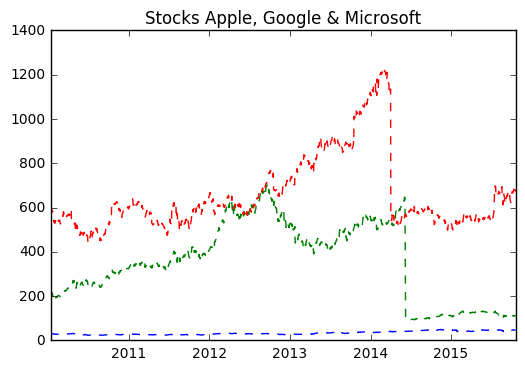

In [9]:
import matplotlib.pyplot as plt
#plt.axis([2, 20, 0, 1])
plt.plot(stock_dates, stock_msft, 'b--')
plt.plot(stock_dates, stock_apple, 'g--')
plt.plot(stock_dates, stock_google, 'r--')
plt.title('Stocks Apple, Google & Microsoft')

plt.show()

Stock prices for microsoft is low but stable over the years. Google and Apple seams to a steady growth with a dramatic fall in the mide of 2014

** 3.2 Can you create training and testing set for predicting whether Apple's stock will increase, based on closing prices of Google, Microsoft and Apple in the previous day? **

In [12]:
def get_lag_1(features_list, increases_list):
    return features_list[:-1],increases_list[1:]

In [13]:
def split(data_list):
    return data_list[1000:], data_list[:1000]

In [15]:
stock_features_lag_1, stock_increases_lag_1 = get_lag_1(stock_features, stock_increases)

In [16]:
stock_features_lag_1_train, stock_features_lag_1_test = split(stock_features_lag_1)
stock_increases_lag_1_train, stock_increases_lag_1_test = split(stock_increases_lag_1)

** 3.3 Can you train a 5-NN classifier algorithm on the training set ? **

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)
knn_fit = knn.fit(stock_features_lag_1_train,stock_increases_lag_1_train)

** 3.4 Can you compute training and testing accuracies of the 5-NN classifier ? Comment **

In [20]:
print "training accuracy:", knn_fit.score(stock_features_lag_1_train,stock_increases_lag_1_train)
print "testing accuracy:", knn_fit.score(stock_features_lag_1_test, stock_increases_lag_1_test)

training accuracy: 0.5
testing accuracy: 0.504


** 3.5 Can you add in stock_features returns of Apple, Microsoft and Google's stocks ? **

In [22]:
for i in xrange(len(stock_features)):
## for each date
    if i > 0:
        for j in xrange(len(stock_features[i])):
            ## for each stock
            stock_return = (stock_features[i][j] - stock_features[i-1][j]) / stock_features[i-1][j]
            stock_features[i].append(stock_return)

In [26]:
stock_features[1]

[587.090003,
 210.650002,
 30.35,
 -0.005741157632555516,
 0.014105531416784483,
 0.009311606252078521]

** 3.6 Can you choose which features to keep for the next training ? **

In [27]:
stock_returns = [x[3:6] for x in stock_features]

In [29]:
stock_returns[1]

[-0.005741157632555516, 0.014105531416784483, 0.009311606252078521]

In [30]:
stock_returns = stock_returns[1:]
stock_dates = stock_dates[1:]
stock_increases = stock_increases[1:]

** Run the following lines to vizualise stock returns. Comment **

In [31]:
stock_apple_return = [x[0] for x in stock_returns]
stock_google_return = [x[1] for x in stock_returns]
stock_msft_return = [x[2] for x in stock_returns]

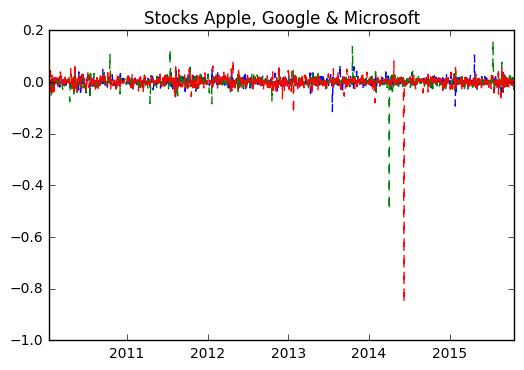

In [32]:
import matplotlib.pyplot as plt
plt.plot(stock_dates, stock_msft_return, 'b--')
plt.plot(stock_dates, stock_apple_return, 'g--')
plt.plot(stock_dates, stock_google_return, 'r--')
plt.title('Stocks Apple, Google & Microsoft')

plt.show()

** 3.7 Can you create training and testing set for predicting whether Apple's stock will increase, based on previous day's returns ? **

In [33]:
stock_returns_lag_1, stock_increases_lag_1 = get_lag_1(stock_returns, stock_increases)

In [34]:
stock_returns_lag_1_train, stock_returns_lag_1_test = split(stock_returns_lag_1)
stock_increases_lag_1_train, stock_increases_lag_1_test = split(stock_increases_lag_1)

** 3.8 Can you train a 3-NN classifier algorithm on the training set ? **

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn.fit(stock_returns_lag_1_train, stock_increases_lag_1_train)

** 3.9 Can you compute training and testing accuracies of the 3-NN classifier ? Comment **

In [37]:
print "training accuracy:", knn.score(stock_returns_lag_1_train, stock_increases_lag_1_train)
print "testing accuracy:", knn.score(stock_returns_lag_1_test, stock_increases_lag_1_test)

training accuracy: 0.757174392936
testing accuracy: 0.513


** 3.10 Can you train and compute prediction accuracies from 1 to 100 neighbors, using uniform weights ?**

At each step, store number of neighbors, training accuracy and testing accuracy in lists called:
- number_neighbors
- accuracy_train 
- accuracy_test

In [24]:
number_neighbors = []
accuracy_train = []
accuracy_test = []

for i in xrange(100):
    knn = KNeighborsClassifier(n_neighbors=i+1,weights='...')
    knn.fit(..., ...)
    
    score_train = knn.score(..., ...)
    score_test = knn.score(..., ...)
    
    number_neighbors.append(i)
    accuracy_test.append(score_test)
    accuracy_train.append(score_train)

** Run the following lines to visualize results. Comment**

In [ ]:
import matplotlib.pyplot as plt
#plt.axis([2, 20, 0, 1])
plt.plot(number_neighbors, accuracy_train, 'r--')
plt.plot(number_neighbors, accuracy_test, 'b--')
plt.title('train & test accuracies over complexity')

plt.show()

** 3.11 Identify optimal number of nearest neighbors ?**

** 3.12 Use this k-NN to predict whether Apple stock will increase or not on the testing sample ?** <br>
Print first 100 results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=...)
knn_fit = knn.fit(..., ...)
predictions = knn_fit.predict(...)
print predictions[0:100]

** 3.13 Use this k-NN to predict class probabilities for Apple stock on the testing sample ?** <br>
Print first 100 results

In [ ]:
class_probabilities = predictions = knn_fit.predict_proba(...)
print class_probabilities[0:100]

** 3.14 Compute precision and recall of this K-NN on the testing sample ?**

In [30]:
def get_bin_values_from_boolean(boolean):
    if boolean == u'TRUE':
        return 1
    elif boolean == u'FALSE':
        return 0

In [36]:
predictions_bin = [get_bin_values_from_boolean(x) for x in predictions]
stock_increases_lag_1_test_bin = [get_bin_values_from_boolean(x) for x in stock_increases_lag_1_test]

In [ ]:
from sklearn.metrics import precision_score, recall_score
testing_precision = precision_score(..., ...)
testing_recall = recall_score(..., ...)
print testing_precision
print testing_recall

## 4. Advantages and drawbacks of instance-based learning